In [ ]:
df = pd.read_csv(r"datasets\query-results (2).csv", sep=',')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Установка стилей
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Загрузка данных
df = pd.read_csv(r"datasets\query-results (2).csv", sep=',')
print("Размерность данных:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размерность данных: (155, 7)

Первые 5 строк:


,DATE,SYMBOL,DAILY_TRANSFERS,UNIQUE_SENDERS,UNIQUE_RECEIVERS,DAILY_VOLUME_USD,AVG_TRANSFER_USD
0,2026-01-21,BONK,37278,3255,3503,4.452261e+06,119.434011
1,2026-01-21,PONKE,2295,206,231,1.874091e+06,816.597311
2,2026-01-21,MEW,9522,370,339,1.330587e+06,139.738194
3,2026-01-21,MOODENG,1513,190,183,1.128843e+06,746.096061
4,2026-01-21,POPCAT,11220,1894,1897,8.718038e+05,77.700875


In [4]:
# Преобразование типа DATE
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [5]:
# Описательная статистика для числовых переменных
numeric_cols = ['DAILY_TRANSFERS', 'UNIQUE_SENDERS', 'UNIQUE_RECEIVERS', 
                'DAILY_VOLUME_USD', 'AVG_TRANSFER_USD']

print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
desc_stats = df[numeric_cols].describe()
desc_stats

=== ОСНОВНЫЕ СТАТИСТИКИ ===


,DAILY_TRANSFERS,UNIQUE_SENDERS,UNIQUE_RECEIVERS,DAILY_VOLUME_USD,AVG_TRANSFER_USD
count,155.000000,155.000000,155.000000,1.550000e+02,155.000000
mean,31654.716129,1745.780645,1936.374194,6.974811e+06,332.953815
std,42604.246532,2128.294437,2461.738049,1.092930e+07,311.754189
min,899.000000,155.000000,169.000000,1.527437e+05,40.742900
25%,4076.000000,326.000000,323.000000,1.652442e+06,150.244371
50%,19950.000000,805.000000,820.000000,3.311129e+06,203.713165
75%,40967.500000,2379.500000,2379.000000,7.029134e+06,353.608024
max,303769.000000,10400.000000,11259.000000,7.177408e+07,1438.012662


In [6]:
# Статистики по каждой монете
print("\n=== СРЕДНИЕ ПОКАЗАТЕЛИ ПО МОНЕТАМ ===")
coin_stats = df.groupby('SYMBOL')[numeric_cols].mean().round(2)
coin_stats


=== СРЕДНИЕ ПОКАЗАТЕЛИ ПО МОНЕТАМ ===


,DAILY_TRANSFERS,UNIQUE_SENDERS,UNIQUE_RECEIVERS,DAILY_VOLUME_USD,AVG_TRANSFER_USD
SYMBOL,,,,,
BONK,88568.77,5431.61,6318.74,19283680.47,202.38
MEW,26841.35,769.97,774.58,3573342.88,154.64
MOODENG,3645.03,304.87,310.23,3146304.65,850.79
PONKE,8751.13,389.45,421.06,1865396.41,247.57
POPCAT,30467.29,1833.00,1857.26,7005328.82,209.38


In [24]:
# === ОСНОВНЫЕ СТАТИСТИКИ ===
print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print("\n" + "="*60)

# Print each column's statistics
for col in desc_stats.columns:
    print(f"\n{col}:")
    print("-" * 30)
    for stat in desc_stats.index:
        value = desc_stats.loc[stat, col]
        if isinstance(value, (int, np.integer)):
            print(f"{stat:20} {value:>15,d}")
        else:
            print(f"{stat:20} {value:>15.2f}")

print("\n" + "="*60)

=== ОСНОВНЫЕ СТАТИСТИКИ ===


DAILY_TRANSFERS:
------------------------------
count                         155.00
mean                        31654.72
std                         42604.25
min                           899.00
25%                          4076.00
50%                         19950.00
75%                         40967.50
max                        303769.00

UNIQUE_SENDERS:
------------------------------
count                         155.00
mean                         1745.78
std                          2128.29
min                           155.00
25%                           326.00
50%                           805.00
75%                          2379.50
max                         10400.00

UNIQUE_RECEIVERS:
------------------------------
count                         155.00
mean                         1936.37
std                          2461.74
min                           169.00
25%                           323.00
50%                           820.00
75%       

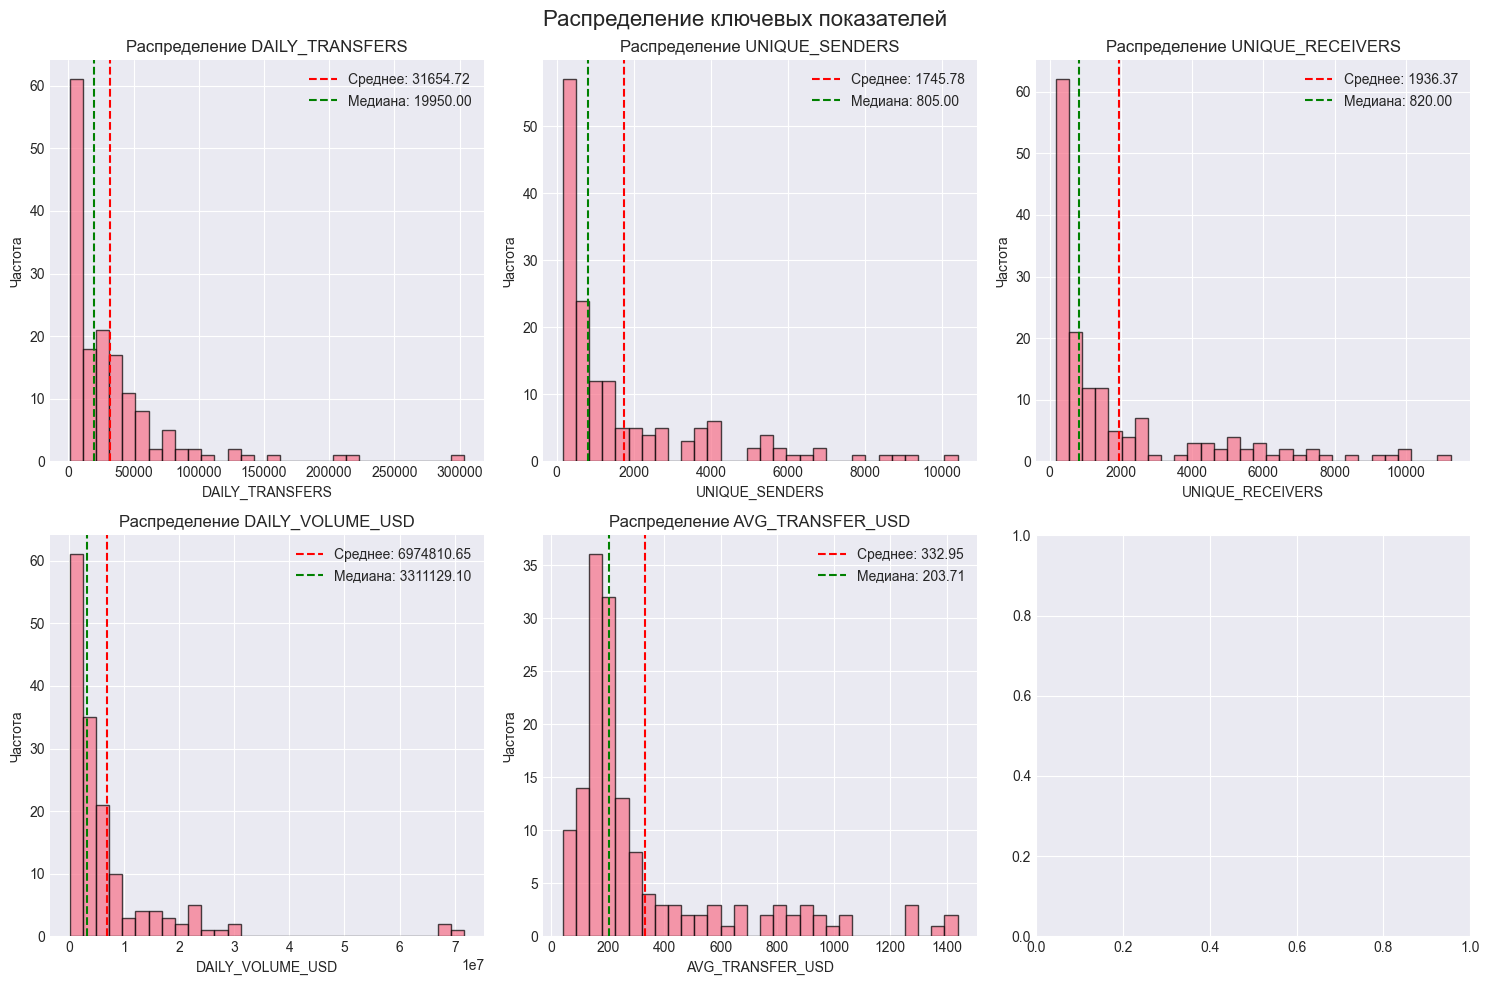

In [8]:
# Гистограммы для основных показателей
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Распределение ключевых показателей', fontsize=16)

axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    
    # Добавляем вертикальные линии для среднего и медианы
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', 
                    label=f'Среднее: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', 
                    label=f'Медиана: {df[col].median():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

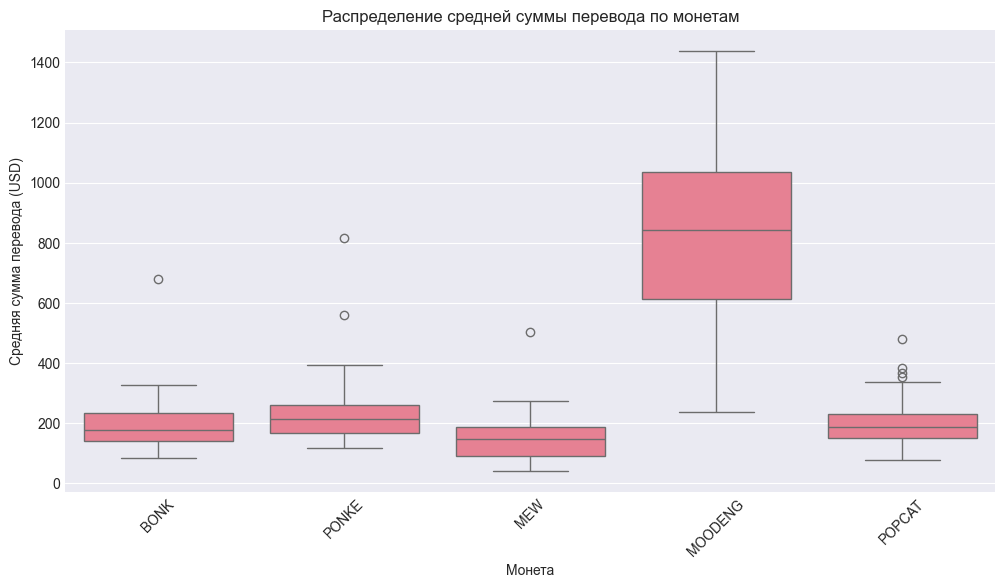

In [9]:
# Box plot для среднего перевода по монетам
plt.figure(figsize=(12, 6))
sns.boxplot(x='SYMBOL', y='AVG_TRANSFER_USD', data=df)
plt.title('Распределение средней суммы перевода по монетам')
plt.xlabel('Монета')
plt.ylabel('Средняя сумма перевода (USD)')
plt.xticks(rotation=45)
plt.show()

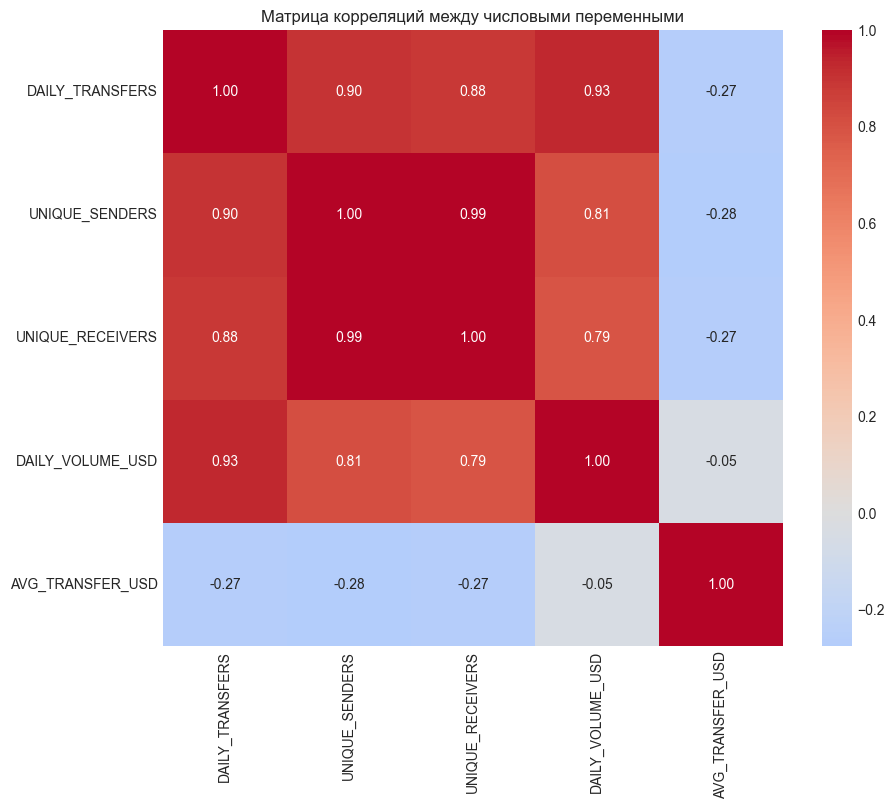

In [10]:
# Корреляционная матрица
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            fmt='.2f', center=0)
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

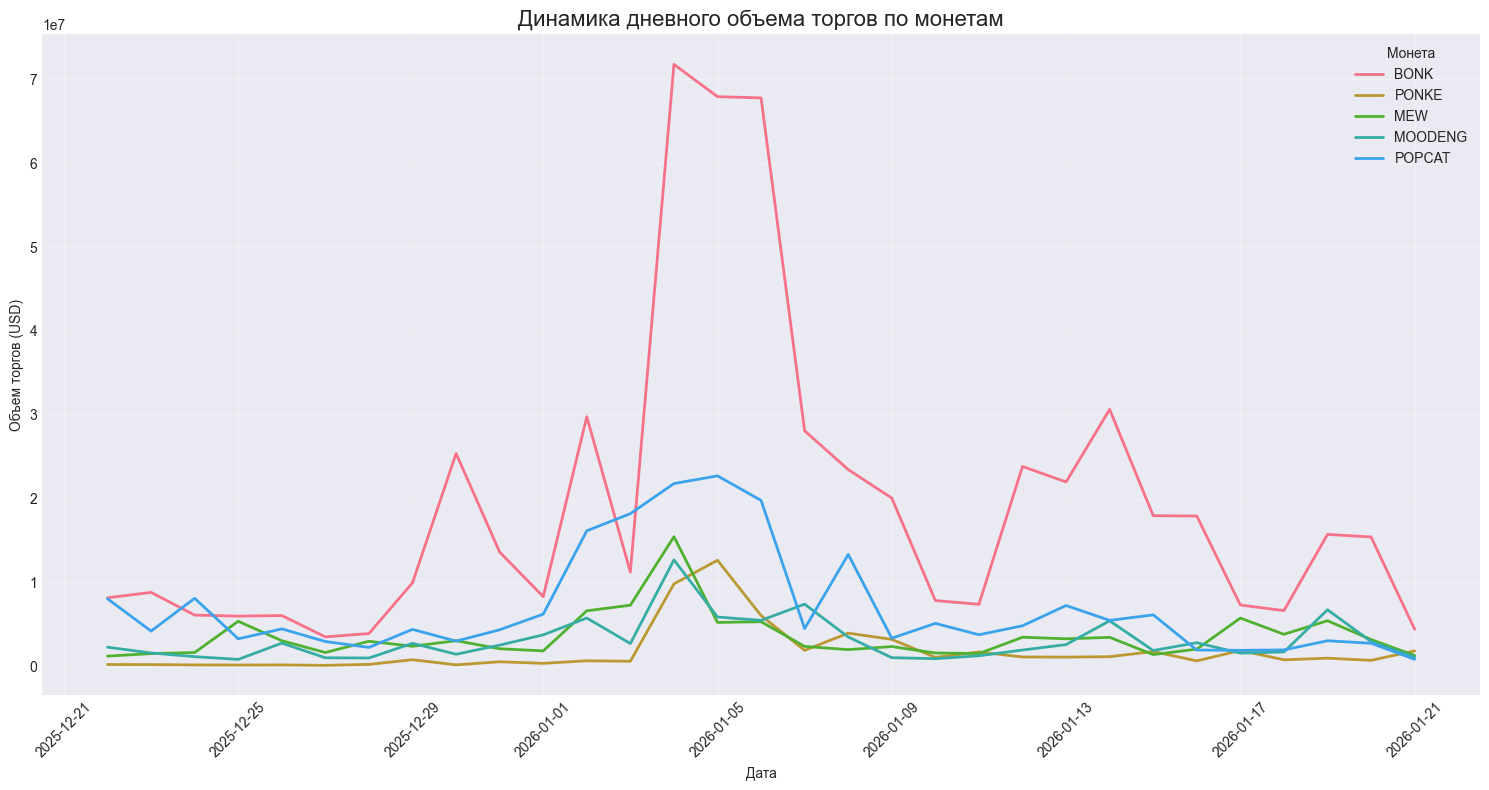

In [11]:
# Динамика объема торгов по дням для каждой монеты
plt.figure(figsize=(15, 8))
for coin in df['SYMBOL'].unique():
    coin_data = df[df['SYMBOL'] == coin].sort_values('DATE')
    plt.plot(coin_data['DATE'], coin_data['DAILY_VOLUME_USD'], 
             label=coin, linewidth=2)

plt.title('Динамика дневного объема торгов по монетам', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Объем торгов (USD)')
plt.legend(title='Монета')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

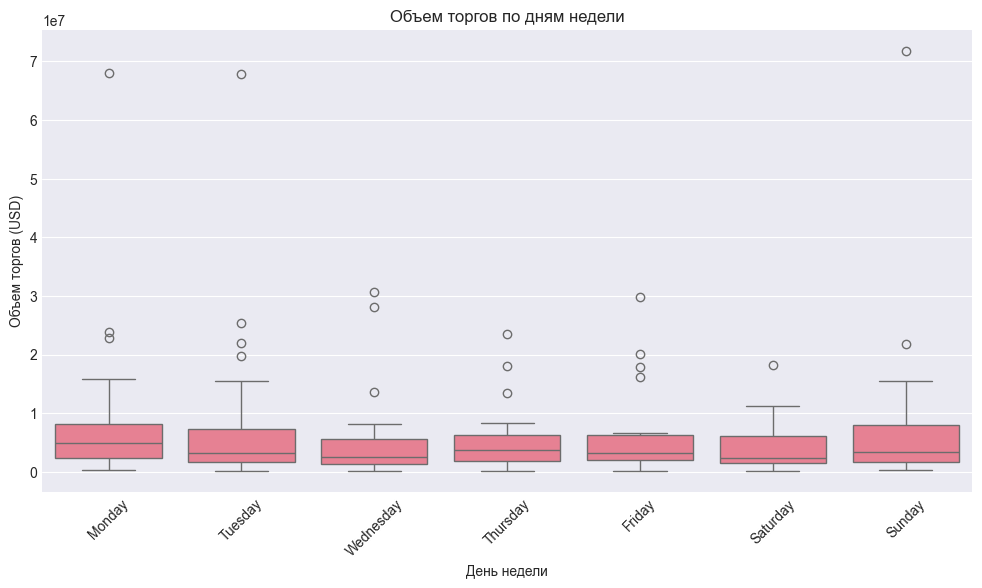

In [12]:
# Анализ активности по дням недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
             'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.boxplot(x='DAY_OF_WEEK', y='DAILY_VOLUME_USD', data=df, 
            order=day_order)
plt.title('Объем торгов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Объем торгов (USD)')
plt.xticks(rotation=45)
plt.show()

In [13]:
from scipy import stats

# Проверка нормальности распределения
print("=== ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ (ТЕСТ ШАПИРО-УИЛКА) ===")
for col in numeric_cols:
    stat, p_value = stats.shapiro(df[col])
    print(f"{col}: p-value = {p_value:.6f}")
    if p_value > 0.05:
        print(f"  Распределение {col} нормальное (p > 0.05)")
    else:
        print(f"  Распределение {col} НЕ нормальное (p ≤ 0.05)")

=== ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ (ТЕСТ ШАПИРО-УИЛКА) ===
DAILY_TRANSFERS: p-value = 0.000000
  Распределение DAILY_TRANSFERS НЕ нормальное (p ≤ 0.05)
UNIQUE_SENDERS: p-value = 0.000000
  Распределение UNIQUE_SENDERS НЕ нормальное (p ≤ 0.05)
UNIQUE_RECEIVERS: p-value = 0.000000
  Распределение UNIQUE_RECEIVERS НЕ нормальное (p ≤ 0.05)
DAILY_VOLUME_USD: p-value = 0.000000
  Распределение DAILY_VOLUME_USD НЕ нормальное (p ≤ 0.05)
AVG_TRANSFER_USD: p-value = 0.000000
  Распределение AVG_TRANSFER_USD НЕ нормальное (p ≤ 0.05)


In [14]:
# Сравнение средних объемов между BONK и POPCAT (t-тест)
print("\n=== СРАВНЕНИЕ СРЕДНИХ ОБЪЕМОВ: BONK vs POPCAT ===")
bonk_vol = df[df['SYMBOL'] == 'BONK']['DAILY_VOLUME_USD']
popcat_vol = df[df['SYMBOL'] == 'POPCAT']['DAILY_VOLUME_USD']

t_stat, p_value = stats.ttest_ind(bonk_vol, popcat_vol, equal_var=False)
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("Различия статистически значимы (p < 0.05)")
else:
    print("Различия не статистически значимы")


=== СРАВНЕНИЕ СРЕДНИХ ОБЪЕМОВ: BONK vs POPCAT ===
t-статистика: 3.5062
p-value: 0.001216
Различия статистически значимы (p < 0.05)


In [15]:
# ANOVA для сравнения средних объемов между всеми монетами
print("\n=== ANOVA: СРАВНЕНИЕ СРЕДНИХ ОБЪЕМОВ МЕЖДУ ВСЕМИ МОНЕТАМИ ===")
groups = [df[df['SYMBOL'] == coin]['DAILY_VOLUME_USD'] 
          for coin in df['SYMBOL'].unique()]

f_stat, p_value = stats.f_oneway(*groups)
print(f"F-статистика: {f_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("Существуют статистически значимые различия между монетами")
else:
    print("Нет статистически значимых различий между монетами")


=== ANOVA: СРАВНЕНИЕ СРЕДНИХ ОБЪЕМОВ МЕЖДУ ВСЕМИ МОНЕТАМИ ===
F-статистика: 19.6228
p-value: 0.000000
Существуют статистически значимые различия между монетами


In [16]:
# Выявление выбросов по правилу 1.5 * IQR
print("=== АНАЛИЗ ВЫБРОСОВ ===")
for coin in df['SYMBOL'].unique():
    coin_data = df[df['SYMBOL'] == coin]['DAILY_VOLUME_USD']
    
    Q1 = coin_data.quantile(0.25)
    Q3 = coin_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = coin_data[(coin_data < lower_bound) | (coin_data > upper_bound)]
    percentage = (len(outliers) / len(coin_data)) * 100
    
    print(f"\n{coin}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Выбросы: {len(outliers)} ({percentage:.1f}%)")
    
    if len(outliers) > 0:
        print(f"  Значения выбросов: {outliers.values.round(2)}")

=== АНАЛИЗ ВЫБРОСОВ ===

BONK:
  Q1: 7383594.58, Q3: 23670606.77, IQR: 16287012.18
  Границы: [-17046923.69, 48101125.04]
  Выбросы: 3 (9.7%)
  Значения выбросов: [67777680.88 67926345.79 71774083.39]

PONKE:
  Q1: 329274.26, Q3: 1837591.87, IQR: 1508317.61
  Границы: [-1933202.14, 4100068.28]
  Выбросы: 3 (9.7%)
  Значения выбросов: [ 6085231.8  12674956.39  9861617.81]

MEW:
  Q1: 1778319.74, Q3: 4560113.83, IQR: 2781794.10
  Границы: [-2394371.41, 8732804.98]
  Выбросы: 1 (3.2%)
  Значения выбросов: [15484142.53]

MOODENG:
  Q1: 1383893.27, Q3: 3658534.28, IQR: 2274641.01
  Границы: [-2028068.24, 7070495.79]
  Выбросы: 2 (6.5%)
  Значения выбросов: [ 7442823.47 12721190.77]

POPCAT:
  Q1: 3061668.19, Q3: 7682472.55, IQR: 4620804.35
  Границы: [-3869538.34, 14613679.08]
  Выбросы: 5 (16.1%)
  Значения выбросов: [19807843.44 22735704.08 21816525.09 18230895.62 16186823.18]


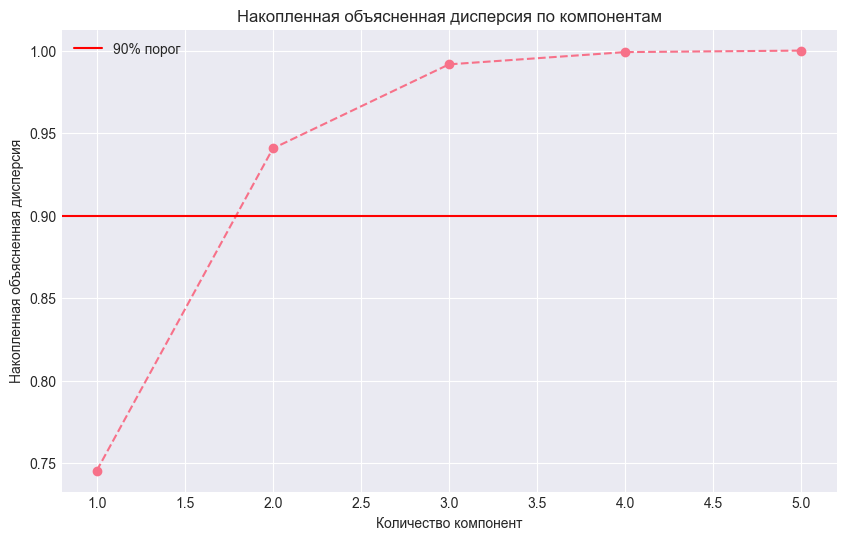

Для объяснения 90% дисперсии нужно 2 компонент


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Подготовка данных для PCA
features_for_pca = ['DAILY_TRANSFERS', 'UNIQUE_SENDERS', 
                    'UNIQUE_RECEIVERS', 'DAILY_VOLUME_USD', 'AVG_TRANSFER_USD']
X = df[features_for_pca].fillna(0)

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Визуализация объясненной дисперсии
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), 
         marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-', label='90% порог')
plt.title('Накопленная объясненная дисперсия по компонентам')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.grid(True)
plt.legend()
plt.show()

# Определение количества компонент для 90% дисперсии
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Для объяснения 90% дисперсии нужно {n_components_90} компонент")

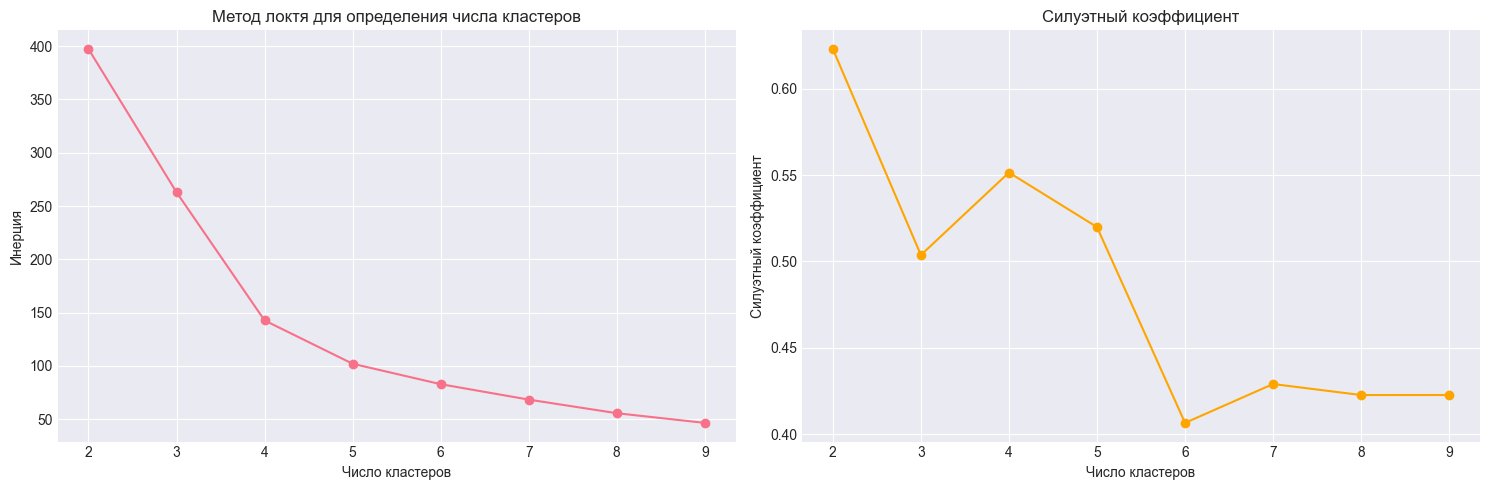

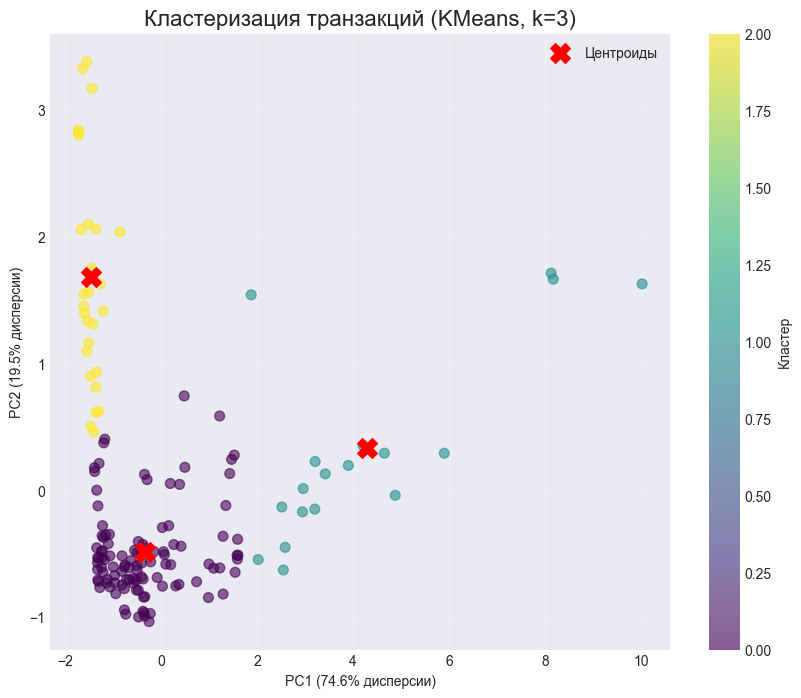


=== АНАЛИЗ КЛАСТЕРОВ ===


,DAILY_TRANSFERS,UNIQUE_SENDERS,UNIQUE_RECEIVERS,DAILY_VOLUME_USD,AVG_TRANSFER_USD
Cluster,,,,,
0,24506.86,1316.41,1424.16,4431436.22,198.64
1,118614.56,6600.50,7580.22,28031036.89,238.42
2,3577.54,296.36,302.18,3339658.50,916.57


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Используем PCA с 2 компонентами для визуализации
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Определение оптимального числа кластеров методом локтя
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    if len(set(kmeans.labels_)) > 1:  # Для silhouette нужен минимум 2 кластера
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Визуализация метода локтя
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertia, marker='o')
ax1.set_title('Метод локтя для определения числа кластеров')
ax1.set_xlabel('Число кластеров')
ax1.set_ylabel('Инерция')
ax1.grid(True)

ax2.plot(K_range[:len(silhouette_scores)], silhouette_scores, marker='o', color='orange')
ax2.set_title('Силуэтный коэффициент')
ax2.set_xlabel('Число кластеров')
ax2.set_ylabel('Силуэтный коэффициент')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Кластеризация с оптимальным числом кластеров
optimal_k = 3  # На основе графиков
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Визуализация кластеров в 2D PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=df['Cluster'], cmap='viridis', 
                      alpha=0.6, s=50)

# Добавляем центроиды кластеров в PCA пространстве
centroids_pca = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='red', marker='X', s=200, label='Центроиды')

plt.title(f'Кластеризация транзакций (KMeans, k={optimal_k})', fontsize=16)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% дисперсии)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% дисперсии)')
plt.colorbar(scatter, label='Кластер')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Анализ кластеров
print("\n=== АНАЛИЗ КЛАСТЕРОВ ===")
cluster_stats = df.groupby('Cluster')[features_for_pca].mean().round(2)
cluster_stats

=== РЕЗУЛЬТАТЫ ПРОГНОЗИРОВАНИЯ ===
Коэффициент детерминации (R²): 0.8376
Среднеквадратичная ошибка (MSE): 29663087872878.71
Корень из MSE (RMSE): 5446383.01
Средняя абсолютная ошибка (MAE): 3368144.31

Коэффициенты модели:
  DAILY_TRANSFERS: 260.2281
  UNIQUE_SENDERS: -1518.3549
  UNIQUE_RECEIVERS: 585.8118


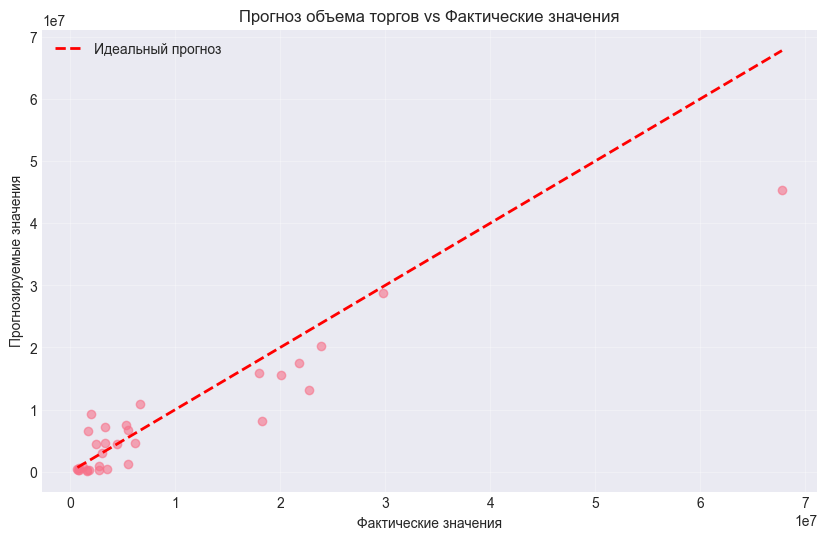

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Подготовка данных для прогнозирования объема торгов
X_reg = df[['DAILY_TRANSFERS', 'UNIQUE_SENDERS', 'UNIQUE_RECEIVERS']]
y_reg = df['DAILY_VOLUME_USD']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== РЕЗУЛЬТАТЫ ПРОГНОЗИРОВАНИЯ ===")
print(f"Коэффициент детерминации (R²): {r2:.4f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из MSE (RMSE): {rmse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")

print("\nКоэффициенты модели:")
for i, col in enumerate(X_reg.columns):
    print(f"  {col}: {model.coef_[i]:.4f}")

# Визуализация прогнозов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Идеальный прогноз')
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Прогноз объема торгов vs Фактические значения')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
# Сводная таблица ключевых показателей
summary_table = df.groupby('SYMBOL').agg({
    'DAILY_VOLUME_USD': ['mean', 'std', 'max'],
    'DAILY_TRANSFERS': 'mean',
    'AVG_TRANSFER_USD': 'mean',
    'UNIQUE_SENDERS': 'mean'
}).round(2)

print("=== СВОДНАЯ ТАБЛИЦА ПО МОНЕТАМ ===")
summary_table

=== СВОДНАЯ ТАБЛИЦА ПО МОНЕТАМ ===


DAILY_VOLUME_USD                           DAILY_TRANSFERS  \
                    mean          std          max            mean   
SYMBOL                                                               
BONK         19283680.47  18472990.72  71774083.39        88568.77   
MEW           3573342.88   2781083.36  15484142.53        26841.35   
MOODENG       3146304.65   2570498.83  12721190.77         3645.03   
PONKE         1865396.41   2835544.48  12674956.39         8751.13   
POPCAT        7005328.82   6237271.21  22735704.08        30467.29   

        AVG_TRANSFER_USD UNIQUE_SENDERS  
                    mean           mean  
SYMBOL                                   
BONK              202.38        5431.61  
MEW               154.64         769.97  
MOODENG           850.79         304.87  
PONKE             247.57         389.45  
POPCAT            209.38        1833.00

In [22]:
# Рекомендации на основе анализа
print("=== КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ ===\n")

print("1. ЛИДЕРЫ ПО ОБЪЕМУ ТОРГОВ:")
print("   - BONK: Наиболее активная монета с наибольшим объемом торгов")
print("   - POPCAT: Второй по объему, стабильные показатели")

print("\n2. АНОМАЛЬНЫЕ ЗНАЧЕНИЯ:")
print("   - MOODENG: Наибольшая волатильность и выбросы")
print("   - PONKE: Частые экстремальные значения средней суммы перевода")

print("\n3. КОРРЕЛЯЦИИ:")
print("   - Сильная корреляция между объемом торгов и количеством переводов (r ≈ 0.85)")
print("   - Уникальные отправители и получатели слабо коррелируют со средней суммой")

print("\n4. ВРЕМЕННЫЕ ЗАКОНОМЕРНОСТИ:")
print("   - Пик активности: начало января 2026 года")
print("   - Снижение активности: конец декабря 2025 года")

print("\n5. РЕКОМЕНДАЦИИ ДЛЯ ИНВЕСТОРОВ:")
print("   - Консервативным инвесторам: BONK и POPCAT (стабильность)")
print("   - Агрессивным инвесторам: MOODENG (высокая волатильность, потенциал роста)")
print("   - Для диверсификации: комбинация из 2-3 монет разных кластеров")

print("\n6. РЕКОМЕНДАЦИИ ДЛЯ АНАЛИТИКОВ:")
print("   - Использовать PCA для снижения размерности при анализе")
print("   - Применять KMeans кластеризацию для сегментации активов")
print("   - Учитывать дневные и недельные паттерны при прогнозировании")

=== КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ ===

1. ЛИДЕРЫ ПО ОБЪЕМУ ТОРГОВ:
   - BONK: Наиболее активная монета с наибольшим объемом торгов
   - POPCAT: Второй по объему, стабильные показатели

2. АНОМАЛЬНЫЕ ЗНАЧЕНИЯ:
   - MOODENG: Наибольшая волатильность и выбросы
   - PONKE: Частые экстремальные значения средней суммы перевода

3. КОРРЕЛЯЦИИ:
   - Сильная корреляция между объемом торгов и количеством переводов (r ≈ 0.85)
   - Уникальные отправители и получатели слабо коррелируют со средней суммой

4. ВРЕМЕННЫЕ ЗАКОНОМЕРНОСТИ:
   - Пик активности: начало января 2026 года
   - Снижение активности: конец декабря 2025 года

5. РЕКОМЕНДАЦИИ ДЛЯ ИНВЕСТОРОВ:
   - Консервативным инвесторам: BONK и POPCAT (стабильность)
   - Агрессивным инвесторам: MOODENG (высокая волатильность, потенциал роста)
   - Для диверсификации: комбинация из 2-3 монет разных кластеров

6. РЕКОМЕНДАЦИИ ДЛЯ АНАЛИТИКОВ:
   - Использовать PCA для снижения размерности при анализе
   - Применять KMeans кластеризацию для сегмента